In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
import plotly.express as px 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from neuralprophet import NeuralProphet
from sklearn.preprocessing import LabelEncoder

/Users/tuna200538/.pyenv/versions/anaconda3-2022.05/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/tuna200538/.pyenv/versions/anaconda3-2022.05/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c106detail19maybe_wrap_dim_slowIxEET_S2_S2_b
  Referenced from: <B6948480-8354-3F3C-AEB1-240AC7AF2598> /Users/tuna200538/.pyenv/versions/anaconda3-2022.05/lib/python3.9/site-packages/torchvision/image.so
  Expected in:     <1E9FA061-EA31-3736-81D0-79A33B965097> /Users/tuna200538/.pyenv/versions/anaconda3-2022.05/lib/python3.9/site-packages/torch/lib/libc10.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


# 날씨 예보 인공지능

사용된 AI 모델
1. XGB Classifier
2. K-Nearest Neighbors Classifier
3. AdaBoost Classifier

In [5]:
df=pd.read_csv("/Users/tuna200538/Desktop/청운고/3학년/지2/data/seattle-weather.csv")

In [6]:
df.shape

(1461, 6)

In [7]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [8]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


# Data Pre-Processing
데이터 전처리

In [10]:
# Converting the Dtype on date from object to datetime
df['date'] = pd.to_datetime(df['date'])

In [11]:
# The column weather contains the data value in the string form and we need to predict the weather data 
# so we convert it to an int as label.
df['weather']=LabelEncoder().fit_transform(df['weather'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 68.6 KB


# 시각화

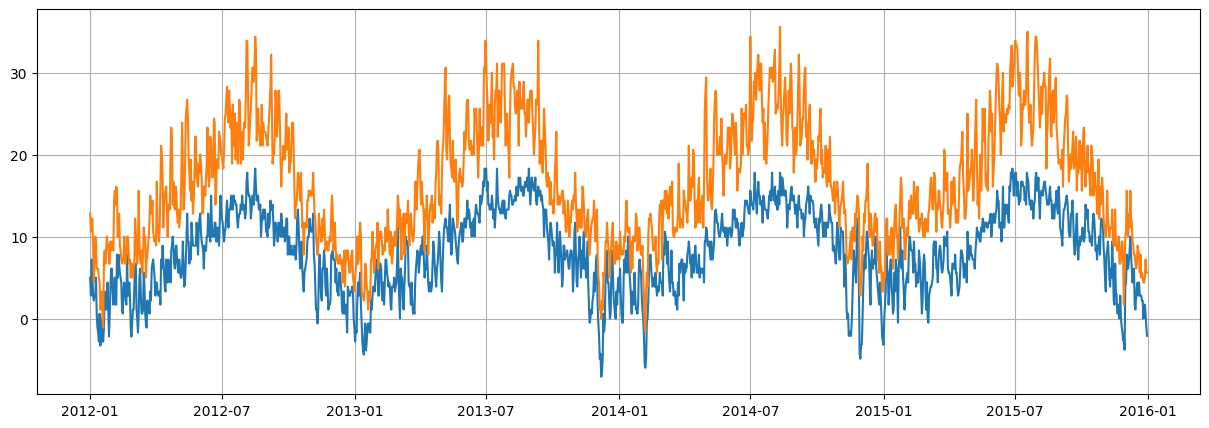

In [13]:
# Visualizing the temperature, observing if there's abnormal data
plt.figure(figsize = (15, 5))
fig = plt.plot(df['date'], df[['temp_min', 'temp_max']])
plt.grid();

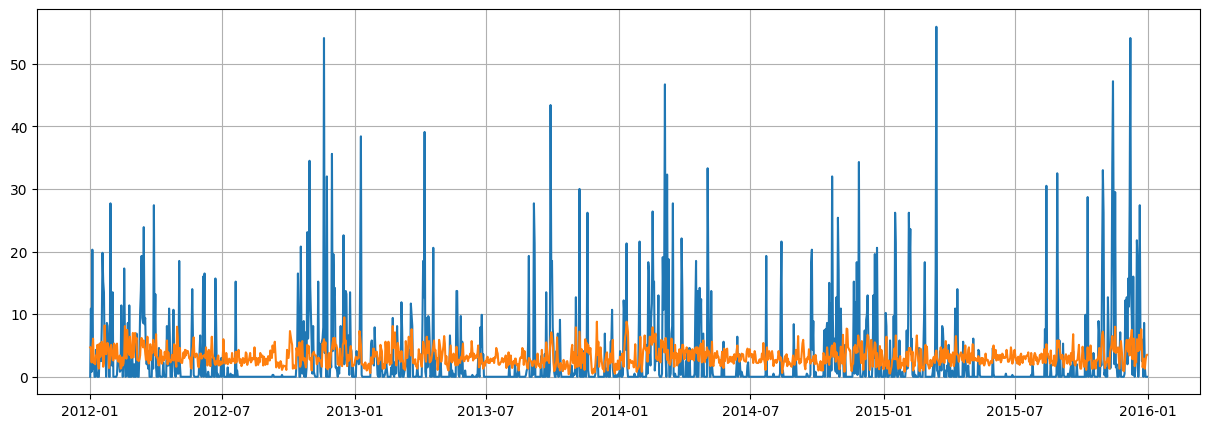

In [14]:
plt.figure(figsize = (15, 5))
fig2 = plt.plot(df['date'], df[['precipitation', 'wind']])
plt.grid();

In [15]:
df['month'] = df['date'].dt.month_name()

fig = px.box(df, df.month, ['temp_min', 'temp_max'])
fig.update_layout(title='Warmest and Coldest Monthly Tempratue.')
fig.show()

In [16]:
df[["precipitation","temp_max","temp_min","wind"]].corr()

,precipitation,temp_max,temp_min,wind
precipitation,1.000000,-0.228555,-0.072684,0.328045
temp_max,-0.228555,1.000000,0.875687,-0.164857
temp_min,-0.072684,0.875687,1.000000,-0.074185
wind,0.328045,-0.164857,-0.074185,1.000000


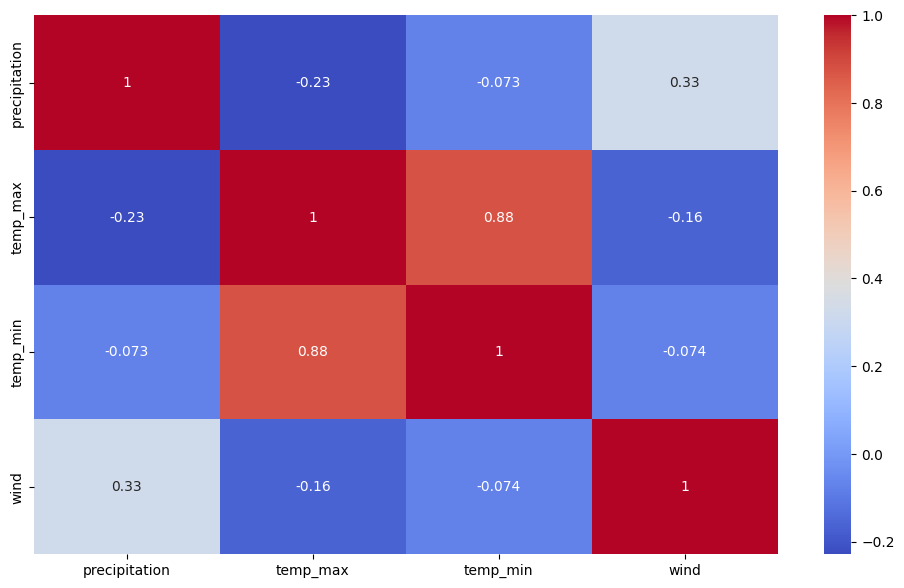

In [17]:
plt.figure(figsize=(12,7))
sns.heatmap(df[["precipitation","temp_max","temp_min","wind"]].corr(),annot=True,cmap='coolwarm');

# 머신러닝 모델 훈련

In [18]:
features=["precipitation", "temp_max", "temp_min", "wind"]
X=df[features]
y=df.weather
X_train, X_test, y_train,y_test = train_test_split(X, y,random_state = 0)

## XGB Classifier

In [19]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
print("XGB Accuracy:{:.2f}%".format(xgb.score(X_test,y_test)*100))

XGB Accuracy:78.42%


## K-Nearest Neighbors Classifier

In [20]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
print("KNN Accuracy:{:.2f}%".format(knn.score(X_test,y_test)*100))

WARNING - (py.warnings._showwarnmsg) - /Users/tuna200538/.pyenv/versions/anaconda3-2022.05/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.




KNN Accuracy:72.68%


## AdaBoost Classifier

In [34]:
ab = AdaBoostClassifier()
ab.fit(X_train, y_train)
print("AB Accuracy:{:.2f}%".format(ab.score(X_test,y_test)*100))

AB Accuracy:84.70%


## GridSearchCV

In [22]:
ab.get_params().keys()

dict_keys(['algorithm', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [23]:
parameters = {
    'learning_rate': [1, 2, 3],
    'n_estimators': [100, 500, 1000]
}

cv = GridSearchCV(ab, param_grid=parameters, scoring='f1_micro', n_jobs=-1, verbose=3)
cv.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 4/5] END .learning_rate=1, n_estimators=100;, score=0.758 total time=   0.2s
[CV 2/5] END .learning_rate=1, n_estimators=100;, score=0.822 total time=   0.2s
[CV 1/5] END .learning_rate=1, n_estimators=100;, score=0.571 total time=   0.2s
[CV 5/5] END .learning_rate=1, n_estimators=100;, score=0.849 total time=   0.1s
[CV 3/5] END .learning_rate=1, n_estimators=100;, score=0.639 total time=   0.1s
[CV 3/5] END .learning_rate=1, n_estimators=500;, score=0.639 total time=   0.7s
[CV 4/5] END .learning_rate=1, n_estimators=500;, score=0.548 total time=   0.8s
[CV 2/5] END .learning_rate=1, n_estimators=500;, score=0.822 total time=   0.8s
[CV 1/5] END .learning_rate=1, n_estimators=500;, score=0.639 total time=   0.9s
[CV 5/5] END .learning_rate=1, n_estimators=500;, score=0.772 total time=   0.8s
[CV 1/5] END .learning_rate=2, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5] END .learning_rate=2, n_estimators=100;,

GridSearchCV(estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [1, 2, 3],
                         'n_estimators': [100, 500, 1000]},
             scoring='f1_micro', verbose=3)

In [24]:
#predicting values from GridSearchCV
y_pred = cv.predict(X_test)

# show classification report on test data
print(classification_report(y_test.values, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00        11
           1       1.00      0.00      0.00        31
           2       0.99      0.92      0.95       155
           3       0.83      0.83      0.83         6
           4       0.75      1.00      0.86       163

    accuracy                           0.85       366
   macro avg       0.92      0.55      0.53       366
weighted avg       0.88      0.85      0.80       366



In [25]:
input=[[1.140175,8.9,2.8,2.469818]]
ot = ab.predict(input)
print("The weather is:")
if(ot==0):
    print("Drizzle")
elif(ot==1):
    print("Fog")
elif(ot==2):
    print("Rain")
elif(ot==3):
    print("snow")
else:
    print("Sun")

WARNING - (py.warnings._showwarnmsg) - /Users/tuna200538/.pyenv/versions/anaconda3-2022.05/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but AdaBoostClassifier was fitted with feature names




The weather is:
Rain
